# Visualisations Scratch Space 

In [1]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
import datetime
sns.set()

### confirmed_data

In [2]:
confirm_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv"

confirm_data_req = requests.get(confirm_data_url).content

confirmed_data = pd.read_csv(io.StringIO(confirm_data_req.decode('utf-8')), delimiter = ',')

In [3]:
confirmed_data.head()

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy


In [4]:
confirmed_data.set_index('case_id', inplace = True)

In [5]:
confirmed_data.drop(['YYYYMMDD','geo_subdivision', 'country'], axis =1, inplace = True)

In [6]:
confirmed_data.head()

,date,province,age,gender,transmission_type
case_id,,,,,
1,05-03-2020,KZN,38.0,male,Travelled to Italy
2,07-03-2020,GP,39.0,female,Travelled to Italy
3,08-03-2020,KZN,38.0,female,Travelled to Italy
4,09-03-2020,KZN,38.0,male,Travelled to Italy
5,09-03-2020,KZN,38.0,female,Travelled to Italy


In [7]:
confirmed_data['date'] = pd.to_datetime(confirmed_data['date'], format='%d-%m-%Y')

In [8]:
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 240
Data columns (total 5 columns):
date                 240 non-null datetime64[ns]
province             240 non-null object
age                  239 non-null float64
gender               240 non-null object
transmission_type    240 non-null object
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 11.2+ KB


**Save data for ease of use later**

In [9]:
confirmed_data.to_csv('confirmed_cases.csv')

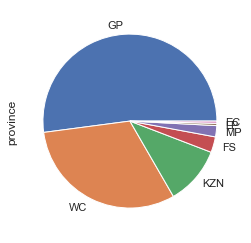

In [21]:
confirmed_data['province'].value_counts().plot(kind='pie')